 ## 1. Install Dependencies and Setup

In [2]:
!pip install cv

In [3]:
!pip list

Package                           Version
--------------------------------- ------------------
absl-py                           2.1.0
aext-assistant                    4.0.15
aext-assistant-server             4.0.15
aext-core                         4.0.15
aext-core-server                  4.0.15
aext-panels                       4.0.15
aext-panels-server                4.0.15
aext-share-notebook               4.0.15
aext-share-notebook-server        4.0.15
aext-shared                       4.0.15
aiobotocore                       2.12.3
aiohttp                           3.9.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.0
anaconda-project                  0.11.1
annotated-ty

In [4]:
import tensorflow as tf
import os

In [5]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
tf.config.list_physical_devices('GPU')

[]

## 2. Remove dodgy images

In [8]:
!pip install opencv-python

In [9]:
import cv2
import imghdr

C:\Users\hp\AppData\Local\Temp\ipykernel_13904\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [10]:
data_dir = 'data'

In [11]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [12]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data\drink\.ipynb_checkpoints
Issue with image data\meal\.ipynb_checkpoints


## 3. Load Data

In [14]:
import numpy as np
from matplotlib import pyplot as plt

In [15]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 428 files belonging to 3 classes.


In [16]:
classnames=data.class_names

In [17]:
data_iterator = data.as_numpy_iterator()

In [18]:
batch = data_iterator.next()

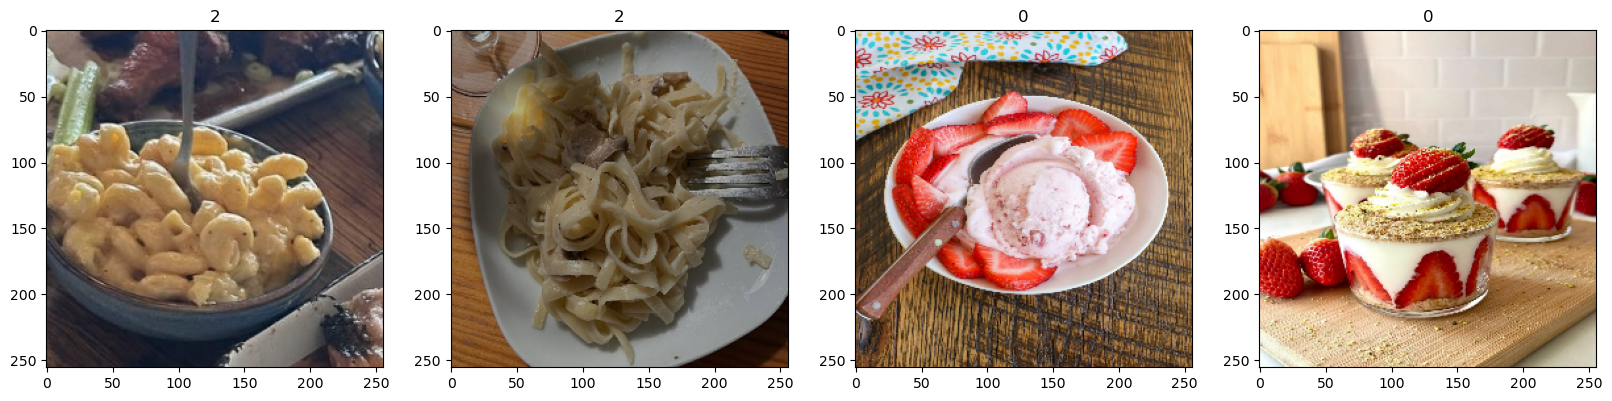

In [19]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 4. Scale Data

In [21]:
data = data.map(lambda x,y: (x/255, y))

In [22]:
data.as_numpy_iterator().next()

(array([[[[0.5582653 , 0.5582653 , 0.5504222 ],
          [0.54622364, 0.54622364, 0.5383805 ],
          [0.5505661 , 0.5505661 , 0.54272294],
          ...,
          [0.76188725, 0.7422794 , 0.71875   ],
          [0.7474086 , 0.7278008 , 0.7042714 ],
          [0.7485286 , 0.72892076, 0.70539135]],
 
         [[0.5929147 , 0.60075784, 0.58899313],
          [0.5142624 , 0.5221055 , 0.5103408 ],
          [0.5761382 , 0.58398134, 0.57221663],
          ...,
          [0.70174325, 0.686057  , 0.65076286],
          [0.6741655 , 0.65455765, 0.63102823],
          [0.6957363 , 0.67612845, 0.65259904]],
 
         [[0.59433067, 0.6021738 , 0.5904091 ],
          [0.5932684 , 0.60111153, 0.5893468 ],
          [0.5471885 , 0.55503166, 0.54326695],
          ...,
          [0.6538996 , 0.63821334, 0.6029192 ],
          [0.66520375, 0.6455959 , 0.6220665 ],
          [0.6637035 , 0.64409566, 0.62056625]],
 
         ...,
 
         [[0.6128718 , 0.60895026, 0.63247967],
          [0.54930

## 5. Split Data

In [24]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [25]:
train_size

9

In [26]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## 6. Build Deep Learning Model

In [28]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,Input

In [30]:
model = Sequential()

In [31]:
model.add(Input(shape=(256, 256, 3)))
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [32]:
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,697,139 (14.10 MB)

 Trainable params: 3,697,139 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## 7. Train

In [35]:
for images, labels in train.take(1):
    print("Image shape:", images.shape)
    print("Image min/max values:", tf.reduce_min(images).numpy(), tf.reduce_max(images).numpy())
    print("Labels shape:", labels.shape)
    print("Unique labels:", np.unique(labels))

Image shape: (32, 256, 256, 3)
Image min/max values: 0.0 1.0
Labels shape: (32,)
Unique labels: [0 1 2]


In [36]:
logdir='logs'

In [37]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [38]:
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 265ms/step - accuracy: 0.3841 - loss: 1.5642 - val_accuracy: 0.5000 - val_loss: 1.0861
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 227ms/step - accuracy: 0.5002 - loss: 1.0548 - val_accuracy: 0.4531 - val_loss: 1.0429
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 250ms/step - accuracy: 0.4815 - loss: 0.9863 - val_accuracy: 0.4844 - val_loss: 0.8990
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 242ms/step - accuracy: 0.5367 - loss: 0.8767 - val_accuracy: 0.6719 - val_loss: 0.7165
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 228ms/step - accuracy: 0.6705 - loss: 0.7154 - val_accuracy: 0.6406 - val_loss: 0.7295
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 233ms/step - accuracy: 0.7224 - loss: 0.6408 - val_accuracy: 0.7656 - val_loss: 0.5993
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 231ms/step - accuracy: 0.7881 - loss: 0.5753 - val_accuracy: 0.8125 - val_loss: 0.4889
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 233ms/step - accuracy: 0.7928 - loss: 0.5276 - val_accuracy: 0.8281 - val_loss:

## 8. Plot Performance

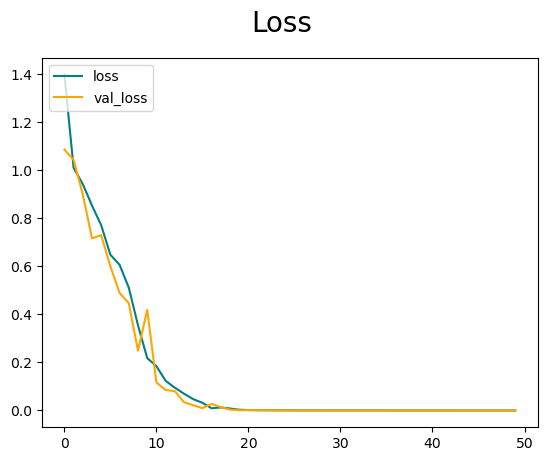

In [40]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

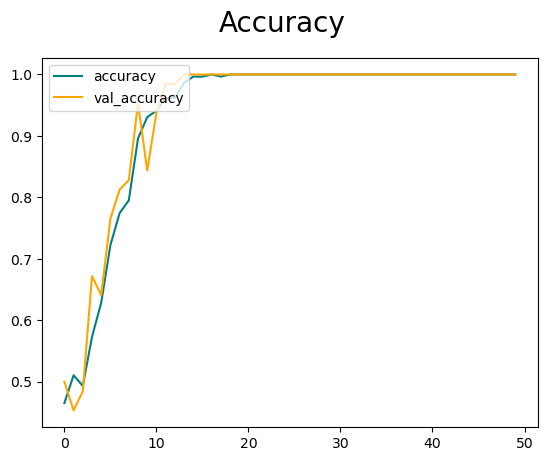

In [41]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## 9. Evaluate

In [43]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [44]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [45]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    y = tf.one_hot(y, depth=3)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


In [46]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


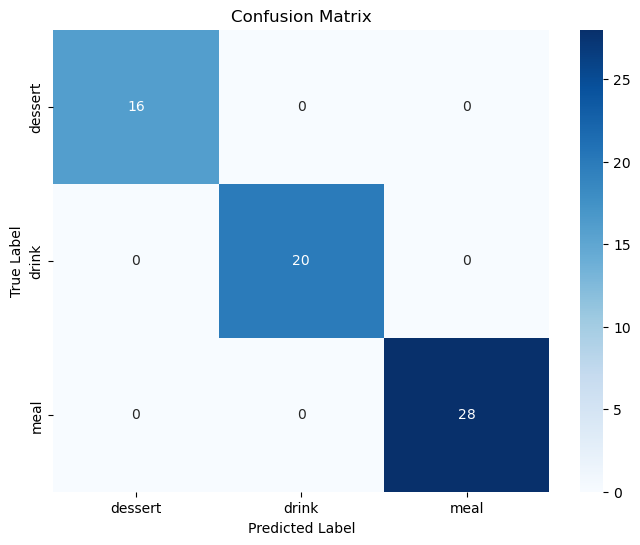

In [47]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

val_labels = []
val_preds = []
class_names=classnames

for batch in val.as_numpy_iterator():
    X_val, y_val = batch
    val_labels.extend(y_val)
    y_pred = model.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)
    val_preds.extend(y_pred_classes)

# Calculate confusion matrix
cm = confusion_matrix(val_labels, val_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## 10. Test

In [49]:
import cv2

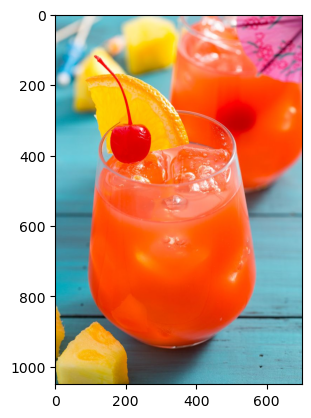

In [110]:
img = cv2.imread('R_1.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

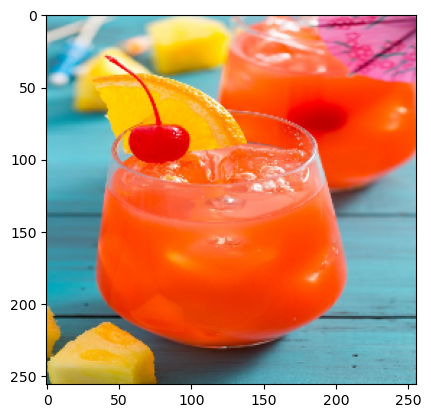

In [112]:
resize = tf.image.resize(img, (256, 256))

# Convert to numpy, ensure type is uint8
resize_uint8 = resize.numpy().astype('uint8')

# Convert from BGR to RGB using OpenCV
plt.imshow(cv2.cvtColor(resize_uint8, cv2.COLOR_BGR2RGB))
plt.show()

In [114]:

yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [116]:
yhat

array([[8.3892992e-06, 9.9999166e-01, 8.4166086e-14]], dtype=float32)

In [118]:
pred_class = np.argmax(yhat, axis=1)
if pred_class[0]==0:
    print('Predicted class is Dessert.')
elif pred_class[0]==1:
    print('Predicted class is Drink.')
else: 
    print('Predicted class is Meal.')

Predicted class is Drink.


## 11. Save the Model

In [121]:
from tensorflow.keras.models import load_model

In [123]:
os.makedirs('models', exist_ok=True)

# Save the model using the recommended .keras format
model.save(os.path.join('models', 'imageclassifier.keras'))

In [125]:
# new_model = load_model('imageclassifier.h5')
import os

print(os.listdir())  # Lists all files in the current directory
from keras.models import load_model

model_path = os.path.join('models', 'imageclassifier.h5')

if os.path.exists(model_path):
    new_model = load_model(model_path)
    print("Model loaded successfully!")
else:
    print("Error: File not found!")


['.ipynb_checkpoints', '2og0zz2jqhm1272qzrly81m_1080x1350.jpg', 'chocolate-mousse-e1484794783688.jpg', 'creamy-penne-pasta-recipe_1.jpg', 'data', 'dessert_original_photo_9_2024-05-24_13-29-43.jpg_dfbff95a-4ffe-46d9-ae53-a55ae4034224.jpg', 'ImageClassificationTherese.ipynb', 'logs', 'models', 'OIP (1).jpg', 'OIP (2).jpg', 'OIP.jpg', 'R.jpeg', 'R.jpg', 'R_1.jpeg', 'slide_326265_3138025_free.jpg', 'soft-drinks.jpg']
Model loaded successfully!


In [127]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


array([[1.1821010e-12, 1.0000000e+00, 3.0945724e-16]], dtype=float32)